In [1]:
from sklearn.datasets import load_boston
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import AffinityPropagation
from collections import OrderedDict
from matplotlib import cm

data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [2]:
def cluster_corr(corr):
    
    _corr = corr.abs()
    
    
    _clustering = AffinityPropagation().fit(_corr)

    _corr['cluster'] = _clustering.labels_
    

    _cols = list(_corr.columns)
    _clus = list(_clustering.labels_)
    

    
    order = {}
    for i in range(0,len(_clus)): 
        order[_cols[i]] = _clus[i]
        

    x = OrderedDict(sorted(order.items(), key=lambda x: x[1]))
    clus_corr = _corr.reindex(x.keys())[list(x.keys())]
    
    return x, clus_corr

In [3]:
def plot_cluster_corr(x, clus_corr):
    sns.set(style="white")
    
    corr = clus_corr
    
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(9, 7))
    #cmap = sns.diverging_palette(20, 10, as_cmap=True)
    cmap = cm.BuPu
    
    sns.heatmap(corr, cmap=cmap, square=True, cbar_kws={"shrink": .75}, vmin=0., vmax=1.)
    ax.set_title('Clustered Correlation Matrix', fontsize=14)

    j = 0
    k = 0
    for i in range(0,len(set(x.values()))):
        z = sum(value == i for value in x.values())
        k+=z
        l=k-z
     
        if i == 0:
            lt_a = lt_c = 3
            lt_b = lt_d = 2
        elif i == (len(set(x.values())) - 1):
            lt_a = lt_c = 2
            lt_b = lt_d = 5        
        else:
            lt_a = lt_b = lt_c = lt_d = 2
       
        ax.hlines(l,l,k, color='k', linewidth=lt_a)
        ax.hlines(k,l,k, color='k', linewidth=lt_b)
        ax.vlines(l,l,k, color='k', linewidth=lt_c)
        ax.vlines(k,l,k, color='k', linewidth=lt_d)    



In [4]:
corr_matrix = df.corr()

In [5]:
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [6]:
x, clus_corr = cluster_corr(corr_matrix)

#x is a dictionary with features and their cluster assignment
#clus_corr is the corr_matrix ordered in the same way as x

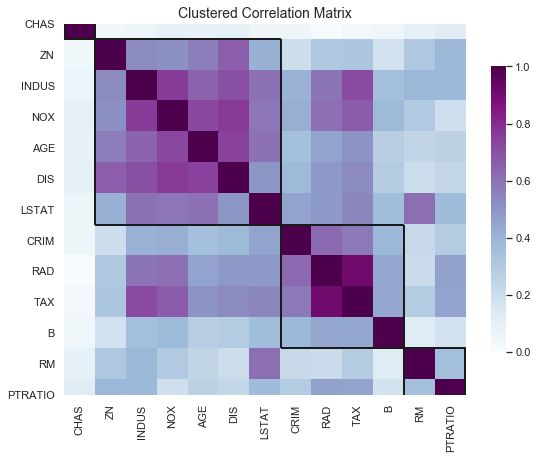

In [7]:
plot_cluster_corr(x, clus_corr)